# Workshop 01: Mug Heating Test
ME 342:  Heat Transfer  
Prof. Sidebotham

On the 1st day of class, a simple experiment was conducted in which hot water was quickly poured into a ceramic mug.  The temperature of the side wall of the mug was measured (with an infrared thermometer) as a function of time.  The goal of this guided workshop is to determine the effective heat transfer coefficient (U, in strict SI units) from this experiment.  As will be discussed later in the course, this experiment and its analysis yields a measurement of the natural convection coefficient of water.

## Step 0:  Acknowledgement/Documentation
Use this Markdown cell to do 2 things:  
1.  Acknowledge who you collaborated with, and discuss both your roles.  For example, "I was really lost with using Jupyter but Betty Smith got me going.  I also watched this YouTube https:website"  or "I helped Fred Jones, since I have a lot of Jupyter experience, but Fred doesn't".
2.  Help your instructor understand where you're coming from.  For example, "I've always been reluctant to write code, and have been able to avoid it usually, but I'm open to building that skill."  or "I think we should be allowed to submit group files."

1. I was accidentally provided with the answer key, and I submitted it individually 
2. I have taken the Data Driven Problem Solving class last semester, and I am very comfortable with Jupyter notebook and python libraries. 

In [2]:
##IMPORTING MODULES WE KNOW WILL BE USED
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#DATA COLLECTED IN CLASS
time = np.array([0, 8.105,10,13,16,19,22,27,32,40,49,65 ])  #oC, time after pouring hot water
temp = np.array([21.6,25, 30,35,40,45,50,55,60,65,70,75])   #sec, Temperature of side wall

T_inf = 79.    #oC, the measured final temperature 
             #after a QUASI-EQUILIBRIUM between the hot water and mug have been established


In [4]:
%whos  
#sometimes, it's helpful in debugging to see what variables have been used, and their values
#they can be commented out

Variable   Type       Data/Info
-------------------------------
T_inf      float      79.0
np         module     <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
temp       ndarray    12: 12 elems, type `float64`, 96 bytes
time       ndarray    12: 12 elems, type `float64`, 96 bytes


## STEP 1:  Redefine initial condition
As we will discover later in the course, there is an initial "set-up" period during which a thermal wave propagates across the mug wall, and therefore there is a delay before the outer wall experiences a significant temperature change.  So we will consider the 2nd point as the starting place.  Therefore, redefine the time and temperature arrays to start at the 2nd point, and set the initial time to zero.  Then plot this data in a well-formatted plot.

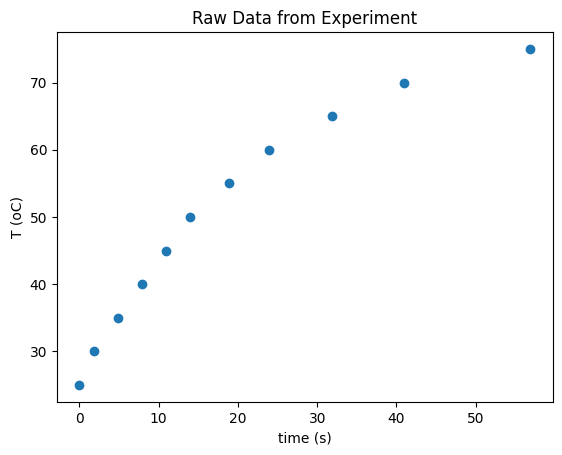

In [5]:
##STEP 1:  CODE THIS STEP IN THIS CELL
time = time[1:]-time[1]
T = temp[1:]

fig,ax = plt.subplots()
ax.scatter(time,T)
ax.set_xlabel('time (s)')
ax.set_ylabel('T (oC)')
ax.set_title('Raw Data from Experiment')
plt.show()

## Step 2:  Define dimensionless temperature, $\theta$
It will prove useful to define dimensionless temperature ($\theta$) that has a value of 1 at the initial state (the redefined initial state), and approaches zero at equilibrium.  That is:  
$\theta = \frac{T-T_\infty}{T_{initial}-T_\infty}$

Therefore, define an array for $\theta$, then prepare 2 subplots each plotting $\theta$ vs time, one on linear axes, the other on semi-logy axes.  Use "scatter" not "plot" to show data points.

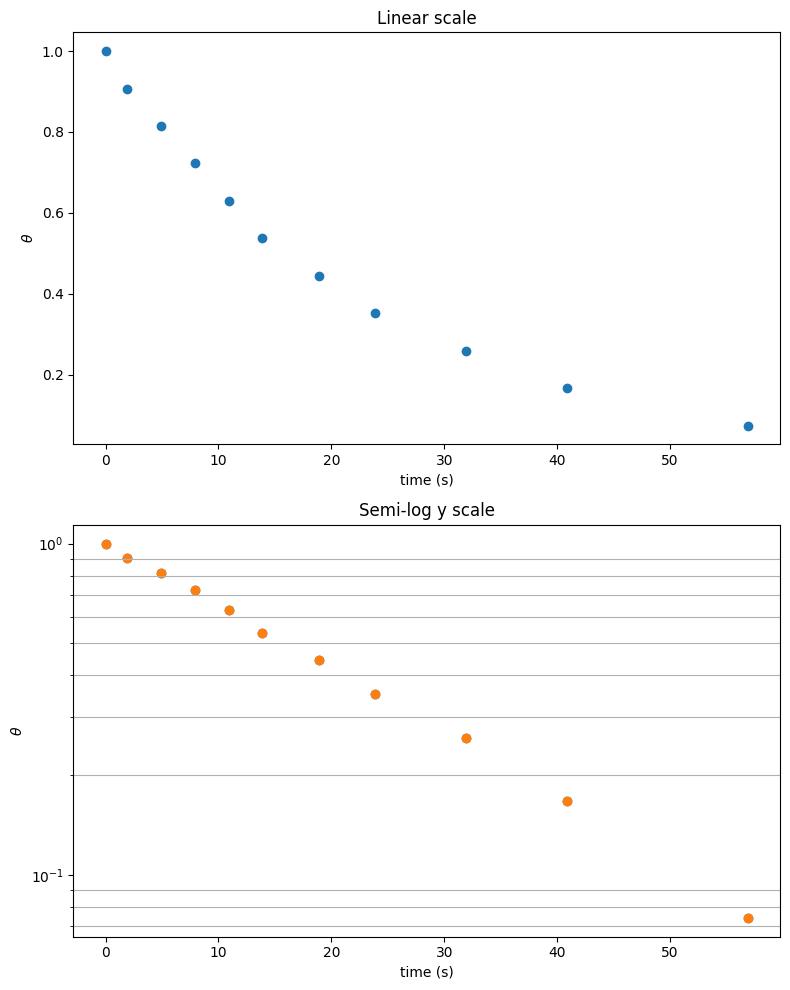

In [6]:
#CODE STEP 2 IN THIS CELL
theta = (T - T_inf)/(T[0] - T_inf)

fig,ax = plt.subplots(2, figsize = (8,10))
ax[0].scatter(time,theta)
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel(r'$\theta$')
ax[0].set_title('Linear scale')
ax[1].scatter(time,theta)
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel(f' $\theta$')
ax[1].scatter(time,theta)
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel(r'$\theta$')
ax[1].set_yscale("log")
ax[1].grid(which = 'minor', axis = 'y')
ax[1].set_title('Semi-log y scale')
plt.tight_layout()
plt.show()

## 1st Order Phenomenological Analysis to determine time constant

A 1st Order model for heat transfer means that the rate of heat transfer is proportional to the temperature difference driving the heat (in addition to being proportional to an appropriately defined surface area, A).  The over-all heat transfer coefficient (U) is the proportionality. That is:
    
$\dot{Q}= UA(T-T_\infty)$  
The over-all heat transfer coef. (U) is assumed to be constant for a 1st order model.  

A general energy balance applied to the system (defined as the mug) is:  
$\frac{dE}{dt} = \dot{Q}_{in} - \dot{W}_{out}$

Defining the system to be the mug itself, the stored energy is related to temperature (property evaluation) by:    
($E - E_{\infty})=Mc(T-T_\infty)$  

and with the work being identically zero, the energy balance on the mug is:  
$Mc\frac{dT}{dt}= -UA(T-T_\infty)  $
    
The solution, written in a dimensionless form (where $\theta = \frac{T-T_\infty}{T_{initial}-T_\infty}$ 
starts at 1, and goes to zero at thermal equilibrium (which theoretically never happens...) is:  
$\theta=e^{\frac{-t}{\tau}}$  
where $\tau = \frac{Mc}{UA}$  is a time constant.

A Curve Fit (using scipy) can be applied to yield the time constant.  This coding is done and explained in the next cell, which may need to be modified just to rename the arrays to how you defined them in Steps 1 and 2.

FYI, the reason this is called a "phenomenological" model is because we are not predicting what U is from 1st principles.  Rather, we are using some physical model (energy balance) to relate some measured value (tau) to the desired quantity (U).  As the course progresses, we will be able to predict something like U closer to 1st principles...  Patience!!


In [7]:
from scipy.optimize import curve_fit     
#This module import could be placed at the top, with the others, but is left here to emphasize how it is used
#It requires a function to fit (with independent variable, t, and then parameter value(s) to determine (tau).
#There's just one parameter for this model, but more complicated models could have more than one.)


def model_func_0(t, tau):   #Function required by "curve_fit" method
    return np.exp(-t/tau)
 
popt, pcov= curve_fit(model_func_0,time,theta,p0=[60])
#time is the independent array to send to function (x,you might have a different name), 
#theta is the dependendent array (y)
#p0 is optional 1st guess, which isn't really needed here, probably, but could be for more complex models
#popt is an ndarray with the parameters (there's just 1 here)
#pcov is an ndarray for the covariance. (not used here. 
#Sidebo is not sure how to interpret it, but it has to do with how good a fit it is)
tau = popt[0]   #This step is needed to return time constant as a float (not 1x1 array)

print('Curve Fit parameters:')
print(f'time_constant = {tau:.3g} sec for mug heating')
print(f"The Covariance is {pcov[0]}, but I don't know what that means :(\n")

%whos   

Curve Fit parameters:
time_constant = 23.1 sec for mug heating
The Covariance is [0.04836511], but I don't know what that means :(

Variable       Type        Data/Info
------------------------------------
T              ndarray     11: 11 elems, type `float64`, 88 bytes
T_inf          float       79.0
ax             ndarray     2: 2 elems, type `object`, 16 bytes
curve_fit      function    <function curve_fit at 0x000001A270EC7C40>
fig            Figure      Figure(800x1000)
model_func_0   function    <function model_func_0 at 0x000001A270D61120>
np             module      <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>
pcov           ndarray     1x1: 1 elems, type `float64`, 8 bytes
plt            module      <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
popt           ndarray     1: 1 elems, type `float64`, 8 bytes
tau            float64     23.09904658877414
temp           ndarray     12: 12 elems, type `float64`, 96 bytes
theta          ndarray     11: 11 elems, 

## Step 3:  Add curve fit to data
- create a time_fit array (use linspace, start at zero, end at last time from experiment) for plotting the curve fit
- Copy and paste your code of the plot from step 2, then add a plot (not scatter) of the curve fit function to it

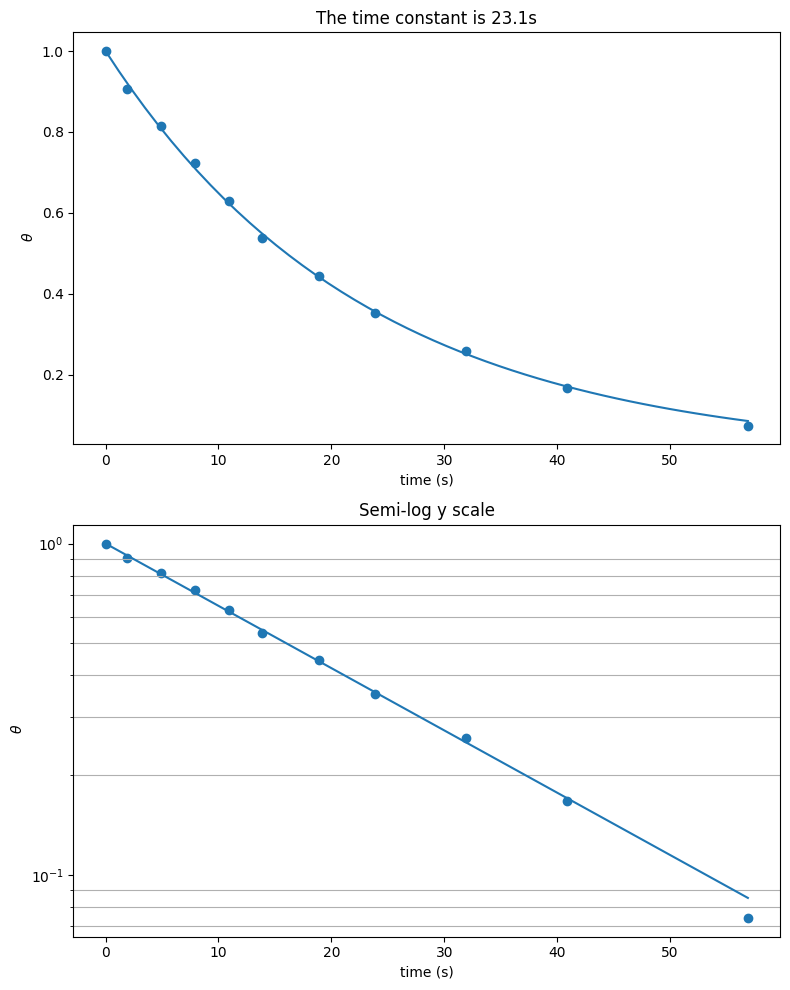

In [8]:
time_fit = np.linspace(0,time[-1])

fig,ax = plt.subplots(2, figsize = (8,10))
ax[0].scatter(time,theta)
ax[0].plot(time_fit,np.exp(-time_fit/tau))
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel(r' $\theta$')
ax[0].set_title(f'The time constant is {tau:.3g}s')
ax[1].scatter(time,theta)
ax[1].plot(time_fit,np.exp(-time_fit/tau))
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel(r' $\theta$')
ax[1].set_yscale("log")
ax[1].grid(which = 'minor', axis = 'y')
ax[1].set_title('Semi-log y scale')
plt.tight_layout()
plt.show()

## Step 4:  Determine U, the over-all heat transfer coefficient
From the phenomenological analysis, the over-all heat transfer coefficient is:  
$U = \frac{Mc}{\tau A}$  
-  In this case, the appropriate AREA to use is the area of contact between the water and the mug, derived from the geometry of the mug
-  the mass was determined by weighing the mug
-  the specific heat COULD be measured separately, but for now, google what the specific heat of a ceramic mug is (cite the source).

In [9]:
#Code Step 4 here:

#INPUT PARAMETERS
d = 0.07178   #m, inside diameter of mug
h = 0.08908   #m, inside height of mug (mug was filled to brim, almost)
m = 0.2425   #kg, mass of mug
c = 800     #J/kg/K, specific heat of mug (cite source)
#Sidebo textbook, p40

#DERIVED PARAMETERS
Capacity_mug = m*c                #J/oC, total capacity of mug
Asides = np.pi*d*h                #m**2, area of inside
Abottom = np.pi/4*d**2            #m**2, area of bottom
Area = Asides + Abottom    #m**2, surface area exposed to H2O
# Area = np.pi*d*h
#FINAL RESULT FOR U
U = m*c/tau/Area
print(f'The convection HT coef between H2O and mug is {U:.4g}W/m**2/K')

The convection HT coef between H2O and mug is 348W/m**2/K


In [10]:
%whos

Variable       Type        Data/Info
------------------------------------
Abottom        float       0.004046660678507049
Area           float       0.02413451430020713
Asides         float       0.02008785362170008
Capacity_mug   float       194.0
T              ndarray     11: 11 elems, type `float64`, 88 bytes
T_inf          float       79.0
U              float64     347.99188132100215
ax             ndarray     2: 2 elems, type `object`, 16 bytes
c              int         800
curve_fit      function    <function curve_fit at 0x000001A270EC7C40>
d              float       0.07178
fig            Figure      Figure(800x1000)
h              float       0.08908
m              float       0.2425
model_func_0   function    <function model_func_0 at 0x000001A270D61120>
np             module      <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>
pcov           ndarray     1x1: 1 elems, type `float64`, 8 bytes
plt            module      <module 'matplotlib.pyplo<...>\\matplotlib\\pyp

## Step 5:  Concluding statements
Add something about this exercise.  Something technical, something about the process.